## C2.3

### Comparing Sorting Algorithms
*2023/04/20*

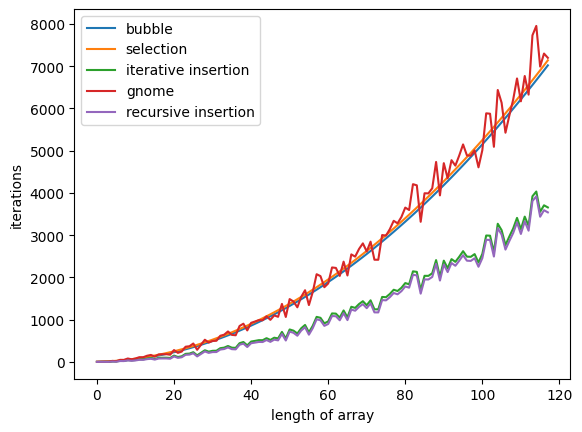

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def bubbleSort(original):
    result = np.copy(original)
    n = len(result)
    iteration = 0

    for i in range(n):
        for j in range(n-i-1):
            if result[j] > result[j+1]: result[j], result[j+1] = result[j+1], result[j]
            iteration+=1
    return result, iteration

def selectionSort(original):
    result = np.copy(original)
    n = len(result)
    iteration = 0

    for i in range(n):
        minIndex = i
        for j in range(i, n):
            if result[j] < result[minIndex]: minIndex = j
            iteration+=1
        result[i], result[minIndex] = result[minIndex], result[i]
    return result, iteration
        
def insertionSort(original):
    result =np.copy(original)
    n = len(result)
    iteration = 0

    for i in range(1, n):
        sel = result[i]
        j = i-1
        while j >= 0 and sel < result[j]: 
            result[j+1] = result[j]
            j-=1
            iteration+=1
        iteration+=1
        result[j+1] = sel
    return result, iteration

def recursiveInsertionSort(original, n):
    global recursiveIteration
    if n<=1: 
        recursiveIteration+=1
        return
    recursiveInsertionSort(original, n-1)
    last = original[n-1]
    j = n-2
    while j>=0 and original[j]>last:
        original[j+1]=original[j]
        j-=1
        recursiveIteration+=1
    original[j+1]=last

def gnomeSort(original):
    result = np.copy(original)
    n =len(result)
    iteration = 0
    i = 0

    while i < n:
        if i == 0 or result[i] > result[i-1]: i+=1
        else:
            result[i], result[i-1] = result[i-1], result[i]
            i-=1
        iteration+=1
    return result, iteration

sortingMethods = np.array(['bubble', 'selection', 'iterative insertion', 'gnome', 'recursive insertion'])
N = np.arange(2, 120, 1)
iterations = np.zeros((len(sortingMethods), len(N)))
for i in range(len(N)):
    arrayN = np.random.rand(N[i])
    iterations[0][i] = bubbleSort(arrayN)[1]
    iterations[1][i] = selectionSort(arrayN)[1]
    iterations[2][i] = insertionSort(arrayN)[1]
    iterations[3][i] = gnomeSort(arrayN)[1]
    recursiveIteration = 0
    recursiveInsertionSort(arrayN, len(arrayN))
    iterations[4][i] = recursiveIteration

for method in range(len(sortingMethods)):
    plt.plot(iterations[method], label=sortingMethods[method])
plt.xlabel('length of array')
plt.ylabel('iterations')
plt.legend()
plt.show()